In [11]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from matplotlib.colors import LogNorm

from glob import glob
import os, sys, pickle, requests
from scipy.stats import linregress

tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] +[[0,0,0]]#+ [[218/255,165/255,32/255]]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [12]:
df = pd.read_json('subset_Z_est_Z_29Apr2020.json')
df['log_AR'] = np.log(df['Activation Ratio'])

In [13]:
Z_packages = ['vienna_1', 'vienna_2','vienna_2_nodangles','vienna_2_60C',
              'vienna_langdon_pars','vienna_rnasoft_pars',
              'contrafold_1','contrafold_2','contrafold_2_nc',
              'eternafold_A','eternafold_B','eternafold_C','eternafold_D',
            'eternafold_E','eternafold_F','eternafold_G']

package_titles = ['Vienna 1', 'Vienna 2', 'Vienna 2, no dangles',
'Vienna 2, 60C', 'Vienna 2, `Langdon 2018` params', 'Vienna 2, `RNASoft 2007` params',
'CONTRAfold 1', 'CONTRAfold 2', 'CONTRAfold 2, noncomplementary',  
'EternaFold_SRR', 'EternaFold_SCRR','EternaFold_S','EternaFold_SR',
                  'EternaFold_SC','EternaFold_C','EternaFold_R']

package_subset = ['vienna_2', 'contrafold_2', 'eternafold_B']
subset_titles = ['Vienna 2', 'CONTRAfold 2', 'EternaFold']


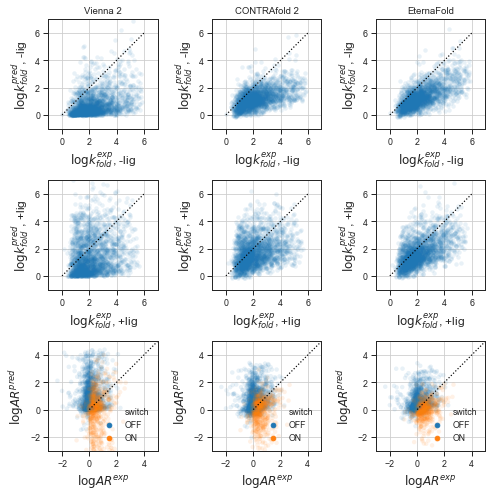

In [4]:
#just ribologic FMN switches, vienna vs contrafold, for main text figure

figure(figsize=(7,7))

tmp_df = df.loc[df['Round']=='Ribologic'][df['ligand']=='FMN']
tmp_df['min_kd_val'] = np.min([np.min(tmp_df['logkd_nolig']), np.min(tmp_df['logkd_lig'])])
tmp_df['logkd_nolig_scaled'] = tmp_df['logkd_nolig'] - tmp_df['min_kd_val']
tmp_df['logkd_lig_scaled'] = tmp_df['logkd_lig'] - tmp_df['min_kd_val']

for i, pkg in enumerate(package_subset):

    subplot(3,3,i+1,aspect='equal')
    sns.scatterplot(x='logkd_nolig_scaled',y='log_kfold_est_nolig_Z_%s' % pkg, data=tmp_df, alpha=0.1, linewidth=0, s=20)
    xlabel(r'$\log k_{fold}^{exp}$, -lig',fontsize=12)
    ylabel(r'$\log k_{fold}^{pred}$, -lig',fontsize=12)
    title(subset_titles[i])

    xlim([-1,7])
    ylim([-1,7])
    plot([0,6],[0,6],linestyle=':',c='k')
    grid()
    
    subplot(3,3,i+4,aspect='equal')
    sns.scatterplot(x='logkd_lig_scaled',y='log_kfold_est_lig_Z_%s' % pkg, data=tmp_df, alpha=0.1, linewidth=0, s=20)
    xlabel(r'$\log k_{fold}^{exp}$, +lig',fontsize=12)
    ylabel(r'$\log k_{fold}^{pred}$, +lig',fontsize=12)
    
    xlim([-1,7])
    ylim([-1,7])
    plot([0,6],[0,6],linestyle=':',c='k')
    grid()
    
    subplot(3,3,i+7,aspect='equal')
    sns.scatterplot(x='log_AR',y='log_AR_est_%s' % pkg, data=tmp_df, hue='switch', alpha=0.1, linewidth=0, s=20)
    xlabel(r'$\log AR^{exp}$',fontsize=12)
    ylabel(r'$\log AR^{pred}$',fontsize=12)
    legend(loc='upper right',frameon=False)
    
    xlim([-3,5])
    ylim([-3,5])
    plot([0,6],[0,6],linestyle=':',c='k')
    legend(loc='lower right', frameon=False)
    grid()

tight_layout()
#savefig('figures/ribologic_FMN_estZ_example.png', dpi=450, bbox_inches='tight')

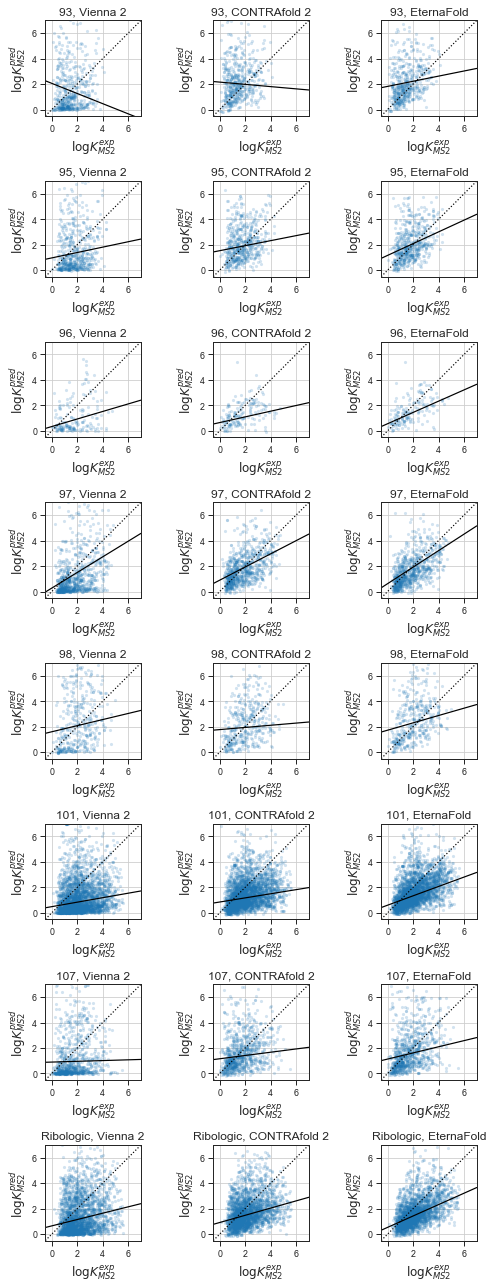

In [10]:
figure(figsize=(7,18))
ctr=1
#new_df = pd.DataFrame()

xmin=-0.5
for j, rnd in enumerate([93, 95, 96, 97, 98, 101, 107,'Ribologic']):

    tmp_df = df.loc[df['Round']==rnd]
#     new_df = new_df.append(tmp_df, ignore_index=True)
#     tmp_df['min_kd_val'] = np.min([np.min(tmp_df['logkd_nolig']), np.min(tmp_df['logkd_lig'])])
#     tmp_df['logkd_nolig_scaled'] = tmp_df['logkd_nolig'] - tmp_df['min_kd_val']
#     tmp_df['logkd_lig_scaled'] = tmp_df['logkd_lig'] - tmp_df['min_kd_val']
    
    for i, pkg in enumerate(package_subset):
        subplot(8,3,ctr,aspect='equal')
        sns.scatterplot(x='logkd_lig_scaled',y='log_kfold_est_lig_Z_%s' % pkg, data=tmp_df, alpha=0.2, linewidth=0, s=10)
        x=tmp_df['logkd_nolig_scaled']
        y=tmp_df['log_kfold_est_lig_Z_%s' % pkg]
        
        m, b = np.poly1d(np.polyfit(x, y, 1))
        #m, _, _, _ = np.linalg.lstsq(x.values.reshape(-1,1), y.values.reshape(-1,1))

        plot([xmin,7],[xmin+b,7*m+b],c='k')
        plot([xmin,7],[xmin,7],linestyle=':',c='k')

        xlabel(r'$\log K_{MS2}^{exp}$',fontsize=12)
        ylabel(r'$\log K_{MS2}^{pred}$',fontsize=12)
        title("%s, %s" % (rnd, subset_titles[i]),fontsize=12)
        xlim([xmin,7])
        ylim([xmin,7])
        xticks([0,2,4,6])
        yticks([0,2,4,6])
        grid()
        ctr +=1
        
tight_layout()
#savefig('figures/kfold_lig_package_subset.png', dpi=300, bbox_inches='tight')

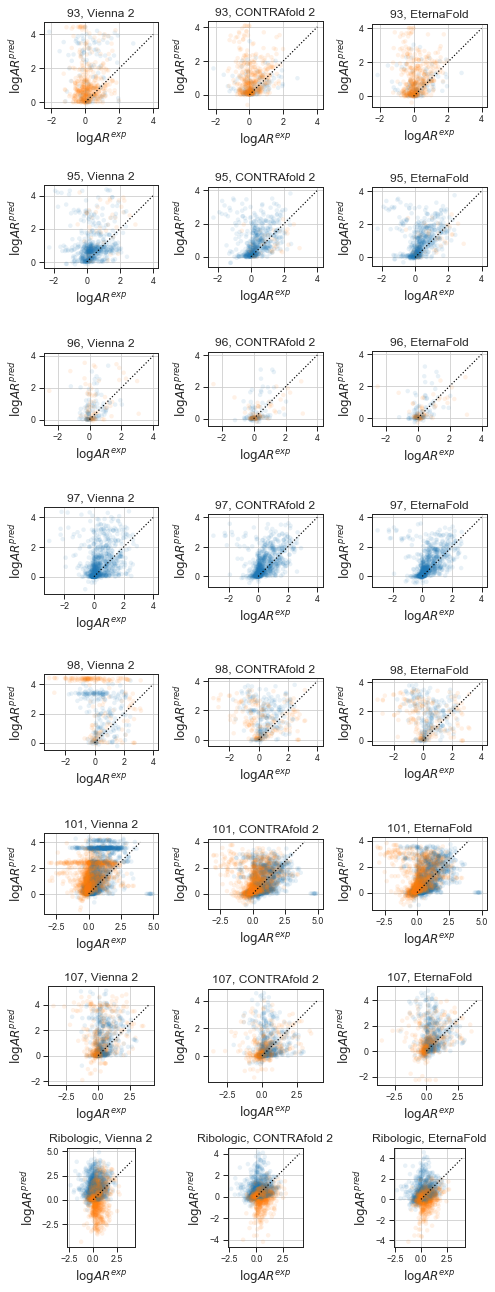

In [78]:
figure(figsize=(7,18))
ctr=1
new_df = pd.DataFrame()
for j, rnd in enumerate([93, 95, 96, 97, 98, 101, 107,'Ribologic']):

    tmp_df = df.loc[df['Round']==rnd]
    new_df = new_df.append(tmp_df, ignore_index=True)
    
    for i, pkg in enumerate(package_subset):
        subplot(8,3,ctr,aspect='equal')
        sns.scatterplot(x='log_AR',y='log_AR_est_%s' % pkg, data=tmp_df, hue='switch', alpha=0.1, linewidth=0, s=20)
        xlabel(r'$\log AR^{exp}$',fontsize=12)
        ylabel(r'$\log AR^{pred}$',fontsize=12)
        title("%s, %s" % (rnd, subset_titles[i]),fontsize=12)
        legend([],frameon=False)
        grid()

        plot([0,4],[0,4],linestyle=':',c='k')
        ctr +=1
        
tight_layout()
savefig('figures/log_AR_package_subset.png', dpi=300, bbox_inches='tight')

In [25]:
def bootstrap_inds(len_item):
    return np.random.choice(range(len_item), len_item)

def compute_rmse(x_data='logkd_nolig_scaled', y_data='log_pij', df=None, package_list=None, n_bootstraps = 100):
    linreg_df = pd.DataFrame(columns=['package','rmse','C'])
    for pkg in package_list:
        for _ in range(n_bootstraps):
            bs_inds = bootstrap_inds(len(df))
            
            x = np.array([df[x_data].iloc[i] for i in bs_inds])
            y = np.array([df['%s_%s' % (y_data, pkg)].iloc[i] for i in bs_inds])
            C = np.corrcoef(x, y)[0][1]
            rmse = np.sqrt(np.mean(np.square(x-y)))
            
            linreg_df = linreg_df.append({'package': pkg, 'package_type': pkg.split('_')[0],
                                          'C': C, 'rmse': rmse}, ignore_index=True)
    return linreg_df

def linreg_wrapper(df, x_data, y_data):
    linreg_df = pd.DataFrame()
    for rnd in df['Round'].unique():
        for lig in df['ligand'].unique():
            tmp_df = df.loc[df['Round']==rnd][df['ligand']==lig]
            if len(tmp_df) > 1: # only do if there exists data for this round and ligand combination
                tmp = compute_rmse(x_data = x_data, y_data = y_data, n_bootstraps=100,
                                   df = tmp_df, package_list = Z_packages)
                if rnd != 'Ribologic': rnd='R %d' % rnd
                tmp['Dataset'] = "%s, %s" % (rnd, lig)
                linreg_df = linreg_df.append(tmp,ignore_index=True)
    return linreg_df

Z_linreg_df = pd.DataFrame()

for x_data, y_data in [('logkd_nolig_scaled','log_kfold_est_nolig_Z'),('logkd_lig_scaled','log_kfold_est_lig_Z'), ('log_AR', 'log_AR_est')]:
    tmp_df = linreg_wrapper(df, x_data, y_data)
    tmp_df['prediction'] = x_data
    Z_linreg_df = Z_linreg_df.append(tmp_df, ignore_index=True)


/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


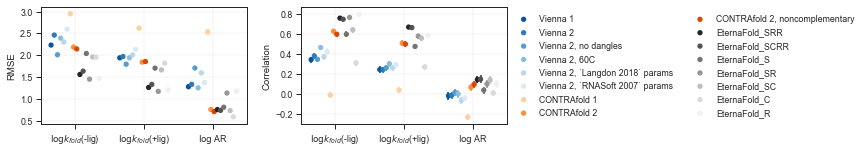

In [79]:
figure(figsize=(12,4))
cmap = sns.color_palette('Blues_r',6)+ sns.color_palette('Oranges',3) + sns.color_palette('Greys_r',7)
tmp_df = Z_linreg_df.loc[Z_linreg_df['Dataset']=='Ribologic, FMN']
tmp_df['label'] = [package_titles[Z_packages.index(x)] for x in tmp_df['package']]

subplot(2,2,1)
ax = sns.pointplot(x='prediction', y='rmse', hue_order=package_titles, data=tmp_df,
                 hue='label',  join=False, ci='sd', marker='.', scale=0.75, dodge=0.7, palette=cmap)
xlabel('')
xticks([0,1,2],[r'$\log k_{fold}$(-lig)', r'$\log k_{fold}$(+lig)', r'$\log$ AR'])
grid(linewidth=0.2)

ylabel('RMSE')
legend([], frameon=False)
subplot(2,2,2)
ax = sns.pointplot(x='prediction', y='C', hue_order=package_titles, data=tmp_df,
                 hue='label',  join=False, ci='sd', marker='.', scale=0.75, dodge=0.7, palette=cmap)
ylabel('Correlation')
xlabel('')
xticks([0,1,2],[r'$\log k_{fold}$(-lig)', r'$\log k_{fold}$(+lig)', r'$\log$ AR'])

grid(linewidth=0.2)

legend(bbox_to_anchor=(1,1), frameon=False,ncol=2)
tight_layout()
savefig('figures/RMSE_Corr_Z_ribologic.pdf',bbox_inches='tight',transparent=True)

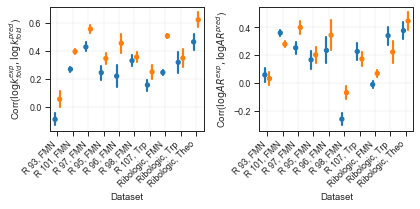

In [80]:
figure(figsize=(6,3))
subplot(1,2,1)
tmp_df = Z_linreg_df.loc[Z_linreg_df['prediction']=='logkd_lig_scaled']

sns.pointplot(x='Dataset', y='C', hue_order=['vienna_2', 'contrafold_2'], data=tmp_df,
               hue='package',  join=False, ci='sd', marker='.', scale=0.75, dodge=0.3)
xticks(rotation=45,horizontalalignment='right')
grid(linewidth=0.2)
ylabel(r'Corr($\log k_{fold}^{exp}, \log k_{fold}^{pred}$)')
legend([],frameon=False)
subplot(1,2,2)
tmp_df = Z_linreg_df.loc[Z_linreg_df['prediction']=='log_AR']

sns.pointplot(x='Dataset', y='C', hue_order=['vienna_2', 'contrafold_2'], data=tmp_df,
               hue='package',  join=False, ci='sd', marker='.', scale=0.75, dodge=0.3)
grid(linewidth=0.2)
legend([],frameon=False)
ylabel(r'Corr($\log AR^{exp}, \log AR^{pred}$)')
xticks(rotation=45,horizontalalignment='right')
tight_layout()
savefig('figures/Corr_Z_subset_all_datasets_-eternafold.pdf',bbox_inches='tight',transparent=True)

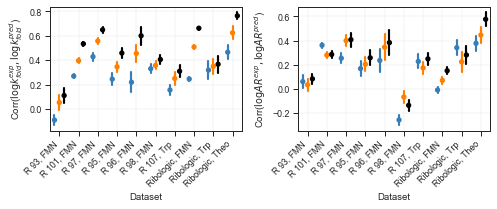

In [81]:
figure(figsize=(7,3))
palette=[standardized_palette[x] for x in [0,3,5]]
subplot(1,2,1)
tmp_df = Z_linreg_df.loc[Z_linreg_df['prediction']=='logkd_lig_scaled']

sns.pointplot(x='Dataset', y='C', hue_order=['vienna_2', 'contrafold_2','eternafold_B'], data=tmp_df,
               hue='package',  join=False, ci='sd', marker='.', scale=0.75, dodge=0.5, palette=palette)
xticks(rotation=45,horizontalalignment='right')
grid(linewidth=0.2)
ylabel(r'Corr($\log k_{fold}^{exp}, \log k_{fold}^{pred}$)')
legend([],frameon=False)
subplot(1,2,2)
tmp_df = Z_linreg_df.loc[Z_linreg_df['prediction']=='log_AR']

sns.pointplot(x='Dataset', y='C', hue_order=['vienna_2', 'contrafold_2','eternafold_B'], data=tmp_df,
               hue='package',  join=False, ci='sd', marker='.', scale=0.75, dodge=0.5, palette=palette)
grid(linewidth=0.2)
legend([],frameon=False)
ylabel(r'Corr($\log AR^{exp}, \log AR^{pred}$)')
xticks(rotation=45,horizontalalignment='right')
tight_layout()
savefig('figures/Corr_Z_subset_all_datasets_+eternafold.pdf',bbox_inches='tight',transparent=True)

In [29]:
mean_stats = Z_linreg_df.groupby(['package','Dataset', 'prediction'],as_index=False)['C','rmse'].mean()
var_stats = Z_linreg_df.groupby(['package','Dataset', 'prediction'],as_index=False)['C','rmse'].var()
mean_stats['C_SE'] = np.sqrt(var_stats['C'])
mean_stats['rmse_SE'] = np.sqrt(var_stats['rmse'])

mean_stats.to_excel('Z_estimation_stats.xlsx')
Z_linreg_df.to_json('Z_estimation_stats.json')

In [73]:
from scipy.stats import ttest_ind

def get_pairwise_significance(corr_df, package_list = None):

    sort_order = ['vienna', 'nupack','rnastructure','contrafold','rnasoft','eternafold']
    #corr_df['package_type'] = corr_df.apply(lambda row: row['package'].split('_')[0], axis=1)

    new_cdf = pd.DataFrame()
    
    for pkg in sort_order:
        tmp_df = corr_df.loc[corr_df['package_type']==pkg]
        new_cdf = new_cdf.append(tmp_df, ignore_index = True)
        
    corr_df = new_cdf
    
    if not package_list:
        package_list = corr_df['package'].unique()
        
    pval_matrix = np.zeros([len(package_list),len(package_list)])
            
    for i, pkg_1 in enumerate(package_list):
        for j, pkg_2 in enumerate(package_list[i+1:]):
            stat, pval = ttest_ind(corr_df.loc[corr_df['package']==pkg_1]['C'],
                  corr_df.loc[corr_df['package']==pkg_2]['C'], equal_var=False)
            
            mean1=np.mean(corr_df.loc[corr_df['package']==pkg_1]['C'])
            mean2=np.mean(corr_df.loc[corr_df['package']==pkg_2]['C'])
            if pval < 0.05:
                if mean1 > mean2:
                    pval_matrix[i,j+i+1] += 1
                    pval_matrix[j+i+1,i] -= 1

                else:
                    pval_matrix[i,j+i+1] -= 1        
                    pval_matrix[j+i+1,i] += 1

            if pval < 0.01:
                if mean1 > mean2:
                    pval_matrix[i,j+i+1] += 1
                    pval_matrix[j+i+1,i] -= 1

                else:
                    pval_matrix[i,j+i+1] -= 1
                    pval_matrix[j+i+1,i] += 1
                    
    imshow(pval_matrix,cmap='seismic', origin='lower',vmin=-3,vmax=3)
    xticks([x for x in range(len(package_list))], package_list, rotation=45, horizontalalignment='right')
    yticks([x for x in range(len(package_list))], package_list)

    plot([-0.5,len(package_list)-0.5],[-0.5,len(package_list)-0.5],color='k')
    cbar = colorbar(fraction=0.07, aspect=6)
    cbar.set_ticks([-2,-1,1,2])
    cbar.set_ticklabels(['p<0.01, A','p<0.05, A','p<0.05, B','p<0.01, B'])
    xlabel('Package A')
    ylabel('Package B')

    return pval_matrix

/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hwayment/mini

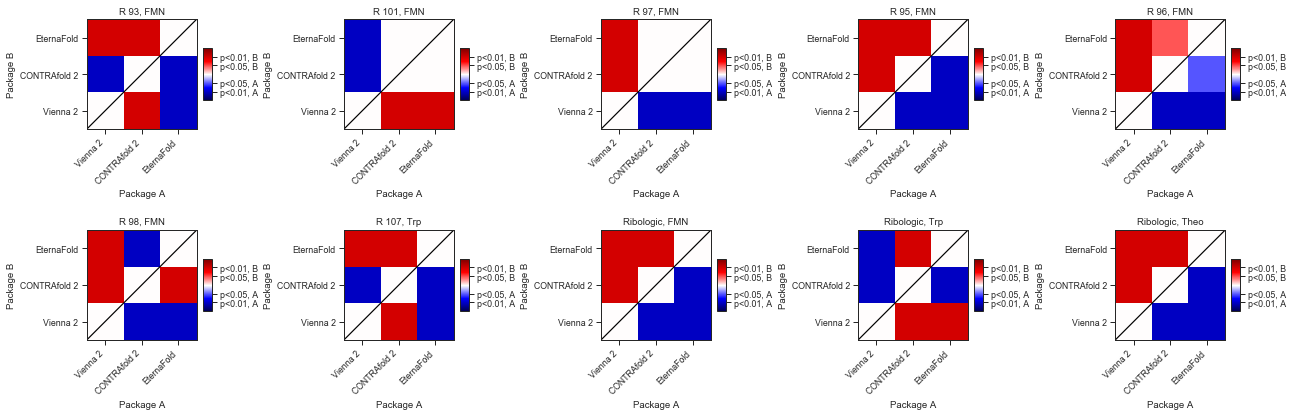

In [89]:
figure(figsize=(18,6))
for i, dataset in enumerate(Z_linreg_df['Dataset'].unique()):
    subplot(2,5,i+1)
    mat = get_pairwise_significance(Z_linreg_df.loc[Z_linreg_df['Dataset']==dataset][Z_linreg_df['prediction']=='log_AR'],package_list=package_subset)
    title(dataset)
    xticks([0,1,2],subset_titles)
    yticks([0,1,2],subset_titles)
tight_layout()
savefig('figures/pvals_Z_logAR.pdf', bbox_inches='tight')

/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hwayment/mini

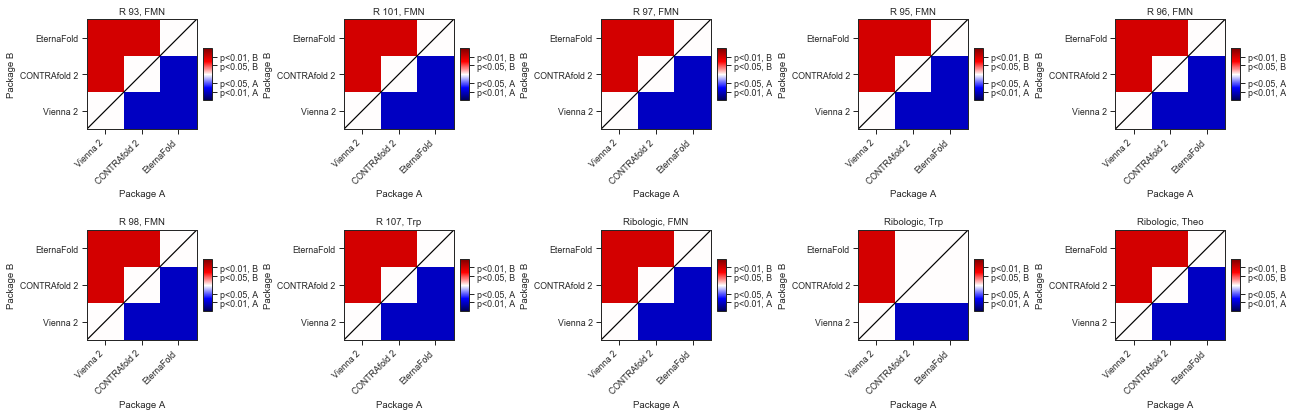

In [88]:
figure(figsize=(18,6))
for i, dataset in enumerate(Z_linreg_df['Dataset'].unique()):
    subplot(2,5,i+1)
    mat = get_pairwise_significance(Z_linreg_df.loc[Z_linreg_df['Dataset']==dataset][Z_linreg_df['prediction']=='logkd_lig_scaled'],package_list=package_subset)
    title(dataset)
    xticks([0,1,2],subset_titles)
    yticks([0,1,2],subset_titles)
tight_layout()
savefig('figures/pvals_Z_logkdlig.pdf', bbox_inches='tight')